#  项目名称：WeRateDogs数据清洗
__目标__：清洗 WeRateDogs 推特数据，创建有趣可靠的分析和可视化。

## 1、数据收集
这一部分要收集三份不同的数据：
- WeRateDogs 推特档案twitter-archive-enhanced.csv，该文件可以从GitHub上直接下载。
- 推特图片预测文件image-predictions.tsv，该文件要利用Python 的 Requests 和对应的URL(https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv) 来进行编程下载 
- 每条推特的数据，至少要包含转发数（retweet_count）和喜欢数（favorite_count），以及任何你觉得有趣的额外数据。在 WeRateDog 推特档案中的推特 ID 中，使用 Python Tweepy 库查询 API 中每个 JSON 数据，把每个推特的 JSON 数据的完整集合存储到一个名为 tweet_json.txt 的文件中。每个推特的 JSON 数据应当写入单独一行。然后将这个 .txt 文件逐行读入一个 pandas DataFrame 中，（至少）包含 tweet ID、retweet_count 和 favorite_count 字段。

### （1）获取WeRateDogs推特档案

In [1]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#直接将从GitHub上下载的twitter-archive-enhanced.csv读入archives
archives = pd.read_csv('twitter-archive-enhanced.csv')
archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### （2）获取图片预测文件（编程下载方式获取文件）

In [3]:
#利用给定的url下载image-predictions.tsv，存入当前文件夹下，并写入predictions
mdata_url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
r = requests.get(mdata_url)
with open('image-predictions.tsv','wb') as file:
    file.write(r.content)

In [4]:
predictions = pd.read_csv('image-predictions.tsv',sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### （3）获取附加信息转发数（retweet_count）和喜欢数（favorite_count）（处理json文件）

In [5]:
#这里由于无法访问Twitter，所以直接从tweet_json.txt中提取需要的附加信息
import json
df_list = []
with open('tweet_json.txt','r') as file:
    for line in file.readlines():
        mjsondata = json.loads(line)
        tweet_id = mjsondata['id']
        retweet_count = mjsondata['retweet_count']
        favorite_count = mjsondata['favorite_count']
        df_list.append({'id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
addinfos = pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count'])

In [6]:
addinfos.head()

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


## 2、数据评估
在这部分分别从视觉和程序上对数据的质量和清洁度进行评估

### （1）视觉评估

In [7]:
#WeRateDogs推特档案
archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


archives各列包括：
- __推特ID(tweet_id)__：每条推特的唯一标识
- __回复ID(in_reply_to_status_id	)__: 回复信息的ID
- __回复人ID(in_reply_to_user_id)__: 回复人的ID
- __时间戳(timestamp)__: 推特发布的时间戳
- __推特信息源(source)__: 推特信息的来源源
- __推特信息内容(text)__: 每条推特信息的内容
- __转发ID(retweeted_status_id)__: 转发信息的ID，如果这里不为空，代表当前的推特是转发的
- __转发人ID(retweeted_status_user_id)__: 转发人的ID，同上如果这里不为空，代表当前的推特是转发的
- __转发时间戳(retweeted_status_timestamp)__: 转发信息的时间戳，同上如果这里不为空，代表当前的推特是转发的
- __扩展url(expanded_urls)__: 扩展url
- __评分分子(rating_numerator)__: 评分分子
- __评分分母(rating_denominator)__: 评分分母
- __狗狗名字(name)__: 狗狗的名字
- __doggo__: 狗狗的一种地位
- __floofer__: 同上
- __pupper__: 同上
- __puppo__: 同上

In [8]:
#图片预测信息
predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


predictions各列包括：
- __推特ID(tweet_id)__：每条推特的唯一标识
- __图片来源(jpg_url)__: 预测图像的资源链接
- __图像编号(img_num)__: 最可信的预测结果对应的图像编号
- __算法对图片的第一种可能性预测(p1)__: 算法对图片的第一种可能性预测
- __算法对图片的第一种预测的可信度(p1_conf)__: 算法对图片的第一种预测的可信度
- __算法对图片的第一种预测是否是狗(p1_dog)__: 算法对图片的第一种预测是否是狗
- __算法对图片的第二种可能性预测(p2)__: 算法对图片的第二种可能性预测
- __算法对图片的第二种预测的可信度(p2_conf)__: 算法对图片的第二种预测的可信度
- __算法对图片的第二种预测是否是狗(p2_dog)__: 算法对图片的第二种预测是否是狗  
以此类推。。。

In [9]:
#twitterid的转发数及喜爱数等附加信息
addinfos

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


addinfos各列包括：
- __推特ID(id)__：每条推特的唯一标识
- __转发数(retweet_count)__: 转发该条推特信息的数量
- __喜爱数(favorite_count)__: 喜欢该条推特信息的数量

### （2）编程评估

In [10]:
archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
archives.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1954,673656262056419329,NaN,NaN,2015-12-07 00:12:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None
1767,678396796259975168,NaN,NaN,2015-12-20 02:09:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These little fellas have opposite facial expre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678396796...,12,10,None,None,None,None,None
1867,675334060156301312,NaN,NaN,2015-12-11 15:19:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Good morning here's a grass pupper. 12/10 http...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675334060...,12,10,None,None,None,pupper,None
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a frustrated pupper attempting to escap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933...,12,10,None,None,None,pupper,None
1251,710997087345876993,NaN,NaN,2016-03-19 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milo and Amos. They are the best of pals....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710997087...,12,10,Milo,None,None,None,None


In [12]:
archives[archives.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [13]:
archives[archives.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
archives[archives.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [15]:
archives.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
archives.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
archives[archives['rating_numerator']==1776].text

979    This is Atticus. He's quite simply America af....
Name: text, dtype: object

In [18]:
archives[archives['rating_numerator']==144].text

1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object

In [19]:
archives.loc[1228].text

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [20]:
archives.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
archives[archives.rating_numerator==75].text

340    RT @dog_rates: This is Logan, the Chow who liv...
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object

In [22]:
archives.loc[340].text

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [23]:
archives[archives.rating_denominator==0].text

313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [24]:
archives.loc[313].text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [25]:
archives[archives.rating_denominator==7].text

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object

In [162]:
archives.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [26]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [27]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
497,675798442703122432,https://pbs.twimg.com/media/CWDrGH4UYAARoq_.jpg,1,beagle,0.681218,True,basset,0.125121,True,boxer,0.080398,True
174,669015743032369152,https://pbs.twimg.com/media/CUjSRNCXAAQ6Y_8.jpg,1,comic_book,0.275927,False,bib,0.173516,False,jersey,0.073911,False
1982,871762521631449091,https://pbs.twimg.com/media/DBkfY58XcAEdzZy.jpg,2,Labrador_retriever,0.921393,True,golden_retriever,0.064608,True,bloodhound,0.003383,True
1336,758355060040593408,https://pbs.twimg.com/media/CoY324eWYAEiDOG.jpg,1,Pembroke,0.987643,True,Cardigan,0.012112,True,Siamese_cat,0.000117,False
1652,809808892968534016,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,1,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True


In [28]:
predictions[predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [29]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [31]:
predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [32]:
addinfos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [33]:
addinfos.describe()

,id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


In [34]:
addinfos.sample(5)

,id,retweet_count,favorite_count
413,822610361945911296,3409,16259
20,887705289381826560,5584,30690
181,856526610513747968,2053,12412
505,812503143955202048,1419,6759
400,824297048279236611,4442,16567


In [35]:
addinfos[addinfos.id.duplicated()]

,id,retweet_count,favorite_count


### 质量问题
#### archives表中
- 有缺失值，in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp,expanded_urls
- doggo，floofer，pupper，puppo这些列的值不准确
- name列不准确（除了正确的名字之外，还有None, an,a这些不正确的值）
- source列代表了推特信息的来源，是HTML文本的样式，只需要其中的内容即可代表推特消息是来源于IPHONE客户端还是网页，即“Twitter for iPhone”等
- in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id这几列的数据类型都是浮点型，应将其转成int型，和tweet_id的数据类型保持一致
- rating_numerator列不准确（提取的评分分子有误，像9.75提取成了75）,rating_denominator列也不准确（评分分母列有误，有0）
- 经过合并后的等级列（stage）数据类型应该是category，timestamp和retweeted_status_timestamp应该是datetime类型


#### predictions表中
- p1,p2,p3预测结果应该统一，首字母统一大写,分隔符统一用下划线‘_’


### 清洁度问题
#### archives表中
- archives包含了推特的信息和推特中宠物狗的信息，应该将推特信息和宠物狗信息分离成两个表tweet_archives_clean,dog_archives_clean
- 应该将doggo，floofer，pupper，puppo这几列合并为stage代表"地位"

#### addinfos表中
- addinfos是推特信息的附加信息，应该同tweet_archives合并
- 应该将id列改名为tweet_id，和其他两个表统一

## 3、数据清理

In [36]:
#清洗之前对原数据进行拷贝
archives_clean = archives.copy()
predictions_clean = predictions.copy()
addinfos_clean = addinfos.copy()

__在正式清理之前，注意一下项目动机中关键要点里面的要求：__
- 只需要含有图片的原始评级，不包括转发的，就是要现剔除掉转发的信息，以及不含图片的推特信息
- 不必收集2017年8月1日以后的数据，这实际上就是剔除2017年8月1日以后的数据

所以在正式清理之前我先进行这两步操作

In [37]:
#先找出转发的tweet_id
retweet_id = list(archives_clean[archives_clean.retweeted_status_id.notnull()].tweet_id)
#再将包含图片的tweet_id，整理出来
include_img_tweetid = list(predictions_clean.tweet_id)

In [38]:
#表archives_clean
#去除转发数
archives_clean = archives_clean[archives_clean.retweeted_status_id.isnull()]
archives_clean.reset_index(drop = True,inplace=True)
#去除不包含图像的推特信息
for i in range(len(archives_clean)):
    if archives_clean.loc[i].tweet_id not in include_img_tweetid:
        archives_clean.drop(i,inplace=True)
archives_clean.reset_index(drop = True,inplace=True)

In [39]:
#表predictions_clean
#去除转发数
for i in range(len(predictions_clean)):
    if predictions_clean.loc[i].tweet_id in retweet_id:
        predictions_clean.drop(i,inplace=True)
predictions_clean.reset_index(drop = True, inplace=True)

In [40]:
#表addinfos_clean
#去除转发数
for i in range(len(addinfos_clean)):
    if addinfos_clean.loc[i].id in retweet_id:
        addinfos_clean.drop(i,inplace=True)
addinfos_clean.reset_index(drop = True, inplace=True)
#去除不包含图像的推特信息
for i in range(len(addinfos_clean)):
    if addinfos_clean.loc[i].id not in include_img_tweetid:
        addinfos_clean.drop(i,inplace=True)
addinfos_clean.reset_index(drop = True,inplace=True)

In [41]:
archives_clean.shape,predictions_clean.shape,addinfos_clean.shape

((1994, 17), (1994, 12), (1994, 3))

经过以上处理，我们将转发的推特信息以及不包含图片的推特信息都剔除掉了，三个表中都包含了1994条数据，终于整齐了(￣▽￣)~*

In [42]:
#查看archives_clean中是否包含2017年8月1日之后的数据
archives_clean.timestamp.sort_values(ascending=False)

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-20 16:49:33 +0000
20      2017-07-19 16:06:48 +0000
21      2017-07-19 03:39:09 +0000
22      2017-07-19 00:47:34 +0000
23      2017-07-18 16:08:03 +0000
24      2017-07-18 00:07:08 +0000
25      2017-07-17 16:17:36 +0000
26      2017-07-16 23:58:41 +0000
27      2017-07-16 20:14:00 +0000
28      2017-07-15 23:25:31 +0000
29      2017-0

可以看出archives_clean中不包含2017年8月1日之后的数据，所以这里的数据符合要求，可以继续进行后面的整理工作了

### （1）缺失值处理  
缺失的信息主要在archives表中，分为两类，一类无法填充，一类可以整理填充
- in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp前面五列代表回复和转发的相关信息，代表了该条推特信息是否是回复或转发的，expanded_urls是原始数据中的扩展url信息，这一类的缺失值__无法进行填充处理__
- name列的值虽然不缺失，但是内容不准确，所以这里先进行处理，从text中提取对应词条进行填充，没有的将其填充为Nan
- doggo,floofer,pupper,puppo 这几列的值虽然不缺失，但相关的内容不准确，所以在此，先进行处理，从text中提取对应词条进行填充，没有的将其填充为Nan
- rating_numerator，rating_denominator这两列代表宠物狗的评分，数字也不准确，在此也对其先进行处理，从text中提取对应词条进行填充，没有的将其填充为Nan

#### 1）先处理name列  
由于宠物狗的名字在推特文本中，没有太多的规律可寻（可能唯一的规律就是名字的首字母大写，但这无法与文本中的其他单词区分）。但是由于这份数据已经由提供者进行了预先的处理，所以可以先观察下数据，进一步找出有利于我们提取名字的帮助信息

In [43]:
archives_clean.name.value_counts()

None         546
a             55
Charlie       11
Lucy          10
Oliver        10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Winston        8
the            7
Toby           7
Lola           7
Daisy          7
Bella          6
Jax            6
an             6
Stanley        6
Bo             6
Koda           6
Buddy          5
Bailey         5
Scout          5
Oscar          5
Dave           5
Louis          5
Chester        5
Milo           5
Leo            5
Rusty          5
            ... 
Dewey          1
Stephanus      1
Hercules       1
Superpup       1
Logan          1
Cali           1
Paull          1
Karll          1
William        1
Kollin         1
Kevon          1
Blitz          1
Pablo          1
Chase          1
Andy           1
Noosh          1
Rumble         1
Ben            1
Skye           1
River          1
Ralphus        1
Emanuel        1
Marlee         1
DonDon         1
Travis         1
Nico           1
Monkey         1
Brady         

对宠物狗的名字进行数量统计，发现重名的宠物狗有不少，其中也有不少的错误值，像None，a，the，an，his，space等，再抽取若干个name列，观察他们的文本内容

In [44]:
#查看名叫Charlie的文本列
archives_clean[archives_clean.name=='Charlie'].text

195     This is Charlie. He wants to know if you have ...
200     This is Charlie. He's wishing you a very fun a...
244     Meet Charlie. She asked u to change the channe...
252     This is Charlie. He fell asleep on a heating v...
287     This is Charlie. He wins every game of chess h...
592     This is Charlie. He works for @TODAYshow. Supe...
688     This is Charlie. He pouts until he gets to go ...
1061    This is Charlie. He's a West Side Niddlewog. M...
1133    Meet Charlie. He likes to kiss all the big mil...
1346    Say hello to Charlie. He's scholarly af. Quite...
1693    This is Charlie. He was just informed that dog...
Name: text, dtype: object

In [45]:
#查看名叫Cooper的文本列
archives_clean[archives_clean.name=='Cooper'].text

102     Say hello to Cooper. His expression is the sam...
357     This is Cooper. Someone attacked him with a sh...
398     This is Cooper. He likes to stick his tongue o...
438     This is Cooper. His bow tie was too heavy for ...
668     This is Cooper. He tries to come across as fei...
709     This is Cooper. He's just so damn happy. 10/10...
1002    This is Cooper. He basks in the glory of rebel...
1038    This is Cooper. He only wakes up to switch gea...
1095    This is Cooper. He began to tear up when his b...
1455    This is Cooper. He doesn't know how cheese wor...
Name: text, dtype: object

In [46]:
#查看名叫Daisy的文本列
archives_clean[archives_clean.name=='Daisy'].text

182     Meet Daisy. She's been pup for adoption for mo...
219     This is Daisy. She's puppears to be rare as al...
257     This is Daisy. She has a heart on her butt. 13...
449     This is Daisy. She's here to make your day bet...
1514    This is Daisy. She loves that shoe. Still no s...
1577    Meet Daisy. She has no eyes &amp; her face has...
1768    Meet Daisy. She's rebellious. Full of teen ang...
Name: text, dtype: object

In [47]:
#查看名叫None的文本列
archives_clean[archives_clean.name=='None'].text

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
23      You may not have known you needed to see this ...
24      This... is a Jubilant Antarctic House Bear. We...
32      Here we have a corgi undercover as a malamute....
36      I present to you, Pup in Hat. Pup in Hat is gr...
41      Please only send dogs. We don't rate mechanics...
52      Ugh not again. We only rate dogs. Please don't...
55      Please don't send in photos without dogs in th...
74      Guys please stop sending pictures without any ...
77      I can't believe this keeps happening. This, is...
79      We usually don't rate Deck-bound Saskatoon Bla...
81      Here's a very large dog. He has a date later. ...
82      Here are my favorite #dogsatpollingstations \n...
84      We. Only. Rate. Dogs. Do not send in other thi...
91      Real funny guys. Sending in a pic without a do...
101     Here's

In [48]:
archives_clean.loc[146].text

'THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA'

In [49]:
archives_clean.loc[126].text

"HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SAY. IT'S. H*CKIN. RIDICULOUS. THAT. DOGS. CAN'T VOTE. ABSOLUTE. CODSWALLUP. THANK. YOU. 13/10 https://t.co/SqKJPwbQ2g"

In [50]:
#查看名叫a的文本列
archives_clean[archives_clean.name=='a'].text

49      Here is a pupper approaching maximum borkdrive...
472     Here is a perfect example of someone who has t...
582     Guys this is getting so out of hand. We only r...
746     This is a mighty rare blue-tailed hammer sherk...
748     Viewer discretion is advised. This is a terrib...
757     This is a carrot. We only rate dogs. Please on...
783     This is a very rare Great Alaskan Bush Pupper....
919     People please. This is a Deadly Mediterranean ...
929     This is a taco. We only rate dogs. Please only...
1045    Here is a heartbreaking scene of an incredible...
1054    Here is a whole flock of puppers.  60/50 I'll ...
1064    This is a Butternut Cumberfloof. It's not wind...
1070    This is a Wild Tuscan Poofwiggle. Careful not ...
1082    "Pupper is a present to world. Here is a bow f...
1185    This is a rare Arctic Wubberfloof. Unamused by...
1398    Guys this really needs to stop. We've been ove...
1441    This is a dog swinging. I really enjoyed it so...
1503    This i

In [51]:
archives_clean.loc[1896].text

'This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD'

In [52]:
archives_clean.loc[1790].text

"This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX"

In [53]:
#查看名叫the的文本列
archives_clean[archives_clean.name=='the'].text

1209    Stop sending in lobsters. This is the final wa...
1275    This is the newly formed pupper a capella grou...
1452    This is the happiest pupper I've ever seen. 10...
1469    This is the saddest/sweetest/best picture I've...
1682    This is the best thing I've ever seen so sprea...
1983    This is the happiest dog you will ever see. Ve...
1984    Here is the Rand Paul of retrievers folks! He'...
Name: text, dtype: object

In [54]:
#查看名叫an的文本列
archives_clean[archives_clean.name=='an'].text

762     This is an Iraqi Speed Kangaroo. It is not a d...
1065    This is an East African Chalupa Seal. We only ...
1846    This is an Irish Rigatoni terrier named Berta....
1971    This is an extremely rare horned Parthenon. No...
1973    This is an Albanian 3 1/2 legged  Episcopalian...
1987    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [55]:
archives_clean.loc[762].text

"This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt"

In [56]:
#查看名叫his的文本列
archives_clean[archives_clean.name=='his'].text

738    That is Quizno. This is his beach. He does not...
Name: text, dtype: object

In [57]:
archives_clean.loc[738].text

'That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7'

In [58]:
#查看名叫space的文本列
archives_clean[archives_clean.name=='space'].text

1675    This is space pup. He's very confused. Tries t...
Name: text, dtype: object

In [59]:
archives_clean.loc[1675].text

"This is space pup. He's very confused. Tries to moonwalk at one point. Super spiffy uniform. 13/10 I love space pup https://t.co/SfPQ2KeLdq"

__经过上面的观察，有以下几个发现:__
    
- 宠物狗名字通常以大写字母开头
- 名字前一般是'This is','Meet','Say hello to'
- 如果是None、a、the、an，一般是确实不包括狗的姓名，或者其中以'named'， 'name is'，'NAME. IS.'，'THIS IS'后的内容没提取出来
- 如果是his, 提取错字段了，应该是以'That is'开头后面的名字
- 如果是space, 提取错了字段，姓名应该以大写字母开头。

    这里进行name的总结，名字前是'This is','Meet','Say hello to'，'That is'，'named','name is'，，'NAME. IS.'，'THIS IS'并且名字首字母是大写，由这些信息来构建正则表达式，利用str.extract()从text中提取宠物狗的名字

In [60]:
#将name从text中提取出来，并且统一成首字母大写的形式
archives_clean.name = archives_clean.text.str.extract('(?:This is|Meet|Say hello to|That is|named|name is|THIS IS|THAT IS|NAME. IS.)\s([A-Z]+[A-Za-z]+)',expand = False).str.lower().str.title()

In [61]:
#看看name列，经过重新提取是否正常
archives_clean.name.value_counts()

Charlie     12
Oliver      10
Lucy        10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Lola         7
Toby         7
Daisy        7
Bella        6
Koda         6
Jax          6
Bo           6
Stanley      6
Buddy        5
Chester      5
Oscar        5
Scout        5
Bailey       5
Louis        5
Leo          5
Rusty        5
Zoey         5
Milo         5
Maggie       4
Gary         4
Clark        4
Duke         4
            ..
Kody         1
Anna         1
Bode         1
Damon        1
Bubba        1
Lacy         1
Tilly        1
Fiji         1
Travis       1
Noosh        1
Rumble       1
Ben          1
William      1
Skye         1
Ralphus      1
Emanuel      1
Marlee       1
Mack         1
Nico         1
Cannon       1
Monkey       1
Brady        1
Blanket      1
Kip          1
River        1
Karll        1
Paull        1
Cali         1
Meatball     1
Blipson      1
Name: name, Length: 935, dtype: int64

In [62]:
archives_clean.name.sample(5)

1132        NaN
133     Trooper
1983        NaN
1666      Patch
1466      Penny
Name: name, dtype: object

#### 2）处理doggo,floofer,pupper,puppo这几列
用str.extract()从text列提取doggo,floofer,pupper,puppo这些单词，如果有，则填充进对应列，没有则直接设为Nan

In [63]:
#考虑到文本内容可以有大小写的影响，这里我们将文本内容都转换成小写，来进行提取
archives_clean.doggo = archives_clean.text.str.lower().str.extract('.*(doggo).*',expand=False)
archives_clean.floofer = archives_clean.text.str.lower().str.extract('.*(floofer).*',expand=False)
archives_clean.pupper = archives_clean.text.str.lower().str.extract('.*(pupper).*',expand=False)
archives_clean.puppo = archives_clean.text.str.lower().str.extract('.*(puppo).*',expand=False)

查看doggo,floofer,pupper,puppo这几列的值，观察经我们提取后是否生效

In [64]:
archives_clean[['doggo','floofer','pupper','puppo']].sample(5)

,doggo,floofer,pupper,puppo
1129,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN
1421,NaN,NaN,NaN,NaN
527,NaN,NaN,NaN,NaN
747,NaN,NaN,NaN,NaN


In [65]:
archives_clean.doggo.value_counts()

doggo    80
Name: doggo, dtype: int64

In [66]:
archives_clean.floofer.value_counts()

floofer    8
Name: floofer, dtype: int64

In [67]:
archives_clean.pupper.value_counts()

pupper    237
Name: pupper, dtype: int64

In [68]:
archives_clean.puppo.value_counts()

puppo    29
Name: puppo, dtype: int64

#### 3）处理rating_numerator,rating_denominator这两列
这里也可以先观察下，原始数据中的这两列数据

In [69]:
archives_clean.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [70]:
archives_clean.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

经过简单的观察，发现其中有异常值，需要重新提取，用str.extract()提取，评分的格式应为x.x/x,将该提取出的部分用split('/')分开,分别填充至rating_denominator和rating_numerator中

In [71]:
#先获取评分字符串，再用split分割，分别存入rating_numerator和rating_denominator中，并且要将数字类型转换正确
scores = archives_clean.text.str.extract('\D*(\d+\.?\d*/\d+)',expand=False)
archives_clean.rating_numerator = scores.str.split('/').str[0].astype(float)
archives_clean.rating_denominator = scores.str.split('/').str[1].astype(float)

In [72]:
archives_clean.rating_numerator.value_counts()

12.00      450
10.00      419
11.00      396
13.00      261
9.00       151
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
24.00        1
9.75         1
84.00        1
13.50        1
143.00       1
420.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64

In [73]:
archives_clean.rating_denominator.value_counts()

10.0     1976
50.0        3
80.0        2
11.0        2
130.0       1
170.0       1
150.0       1
2.0         1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

In [74]:
archives_clean[archives_clean.rating_numerator.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [75]:
archives_clean[archives_clean.rating_denominator.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### （2）整洁度处理
#### 1）应该将archives表拆分成两个表推特信息表tweet_archives_clean和宠物狗信息表dog_archives_clean

In [76]:
archives_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [77]:
#拆分archives_clean，tweet_archives_clean中包含推特信息，dog_archives_clean中包含推特中的宠物狗信息
tweet_archives_clean = archives_clean[['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls']]
dog_archives_clean = archives_clean[['tweet_id', 'rating_numerator','rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

In [78]:
tweet_archives_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...


In [79]:
dog_archives_clean.sample(5)

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
272,829011960981237760,13.0,10.0,Dexter,NaN,NaN,NaN,NaN
746,747885874273214464,8.0,10.0,NaN,NaN,NaN,NaN,NaN
1869,668256321989451776,13.0,10.0,Jareld,NaN,NaN,NaN,NaN
1948,666786068205871104,2.0,10.0,NaN,NaN,NaN,NaN,NaN
1704,671182547775299584,12.0,10.0,NaN,NaN,NaN,NaN,NaN


#### 2）将doggo，floofer，pupper，puppo这几列合并为stage代表"地位"
将doggo，floofer，pupper，puppo这几列中的Nan值改为''，再将他们加起来，新建一列stage，赋值到stage上

In [80]:
#替换doggo，floofer，pupper，puppo这几列中的Nan值，新建一列stage，赋值到stage上
dog_archives_clean.doggo.replace(np.nan,'',inplace=True)
dog_archives_clean.floofer.replace(np.nan,'',inplace=True)
dog_archives_clean.pupper.replace(np.nan,'',inplace=True)
dog_archives_clean.puppo.replace(np.nan,'',inplace=True)
dog_archives_clean['stage'] = dog_archives_clean.doggo+dog_archives_clean.floofer+dog_archives_clean.pupper+dog_archives_clean.puppo

C:\Users\ilp\Anaconda2\envs\py3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\ilp\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
#将doggo，floofer，pupper，puppo这几列删掉，并且将stage列为''的值替换成np.nan
dog_archives_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)
dog_archives_clean.stage.replace('',np.nan,inplace=True)

C:\Users\ilp\Anaconda2\envs\py3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\ilp\Anaconda2\envs\py3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [82]:
dog_archives_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,stage
0,892420643555336193,13.0,10.0,Phineas,NaN
1,892177421306343426,13.0,10.0,Tilly,NaN
2,891815181378084864,12.0,10.0,Archie,NaN
3,891689557279858688,13.0,10.0,Darla,NaN
4,891327558926688256,12.0,10.0,Franklin,NaN


In [83]:
dog_archives_clean.stage.value_counts()

pupper          228
doggo            68
puppo            27
doggopupper       9
floofer           7
doggopuppo        2
doggofloofer      1
Name: stage, dtype: int64

#### 3）将addinfos_clean中的转发数和喜欢数加到推特信息表tweet_archives_clean中
用pd.merge来进行合并

In [84]:
addinfos_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [85]:
tweet_archives_clean = pd.merge(tweet_archives_clean,addinfos_clean,left_on='tweet_id',right_on='id',how='left')
tweet_archives_clean.drop('id',axis=1,inplace=True)

In [86]:
tweet_archives_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,8842,39492
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,6480,33786
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,4301,25445
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,8925,42863
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,9721,41016


#### 4）将addinfos_clean的id列改成tweet_id，和其他表统一

In [87]:
addinfos.rename(index=str,columns={'id':'tweet_id'},inplace=True)

In [88]:
addinfos.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


### （3）质量问题处理
#### 1）source列的处理
将HTML文本中的内容提取出来

In [89]:
tweet_archives_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [90]:
tweet_archives_clean.source = tweet_archives_clean.source.str.extract('>(.+)<',expand=False)

In [91]:
#测试检验效果
tweet_archives_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [92]:
tweet_archives_clean.source.sample(5)

142     Twitter for iPhone
90      Twitter for iPhone
463     Twitter for iPhone
471     Twitter for iPhone
1776    Twitter for iPhone
Name: source, dtype: object

#### 2）in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id这几列的数据类型都是浮点型，应将其转成int型，

In [93]:
tweet_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 163.6+ KB


In [94]:
#将in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id这几列中的空值用0填充，然后将其
tweet_archives_clean.in_reply_to_status_id = tweet_archives_clean.in_reply_to_status_id.fillna(0).astype('int64')
tweet_archives_clean.in_reply_to_user_id = tweet_archives_clean.in_reply_to_user_id.fillna(0).astype('int64')
tweet_archives_clean.retweeted_status_id = tweet_archives_clean.retweeted_status_id.fillna(0).astype('int64')
tweet_archives_clean.retweeted_status_user_id = tweet_archives_clean.retweeted_status_user_id.fillna(0).astype('int64')

In [95]:
#查看转换后的回复，转发列的数据类型
tweet_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           1994 non-null int64
retweeted_status_user_id      1994 non-null int64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
dtypes: int64(7), object(5)
memory usage: 163.6+ KB


In [96]:
#查看id的格式是否正确
tweet_archives_clean[tweet_archives_clean.in_reply_to_status_id != 0].in_reply_to_status_id

119     667152164079423488
146     855818117272018944
192     759099523532779520
419     733109485275860992
756     746885919387574272
758     691416866452082688
855     729113531270991872
1035    703255935813287936
1044    667152164079423488
1059    703041949650034688
1145    675349384339542016
1156    670668383499735040
1187    692041934689402880
1298    684481074559381504
1302    684222868335505408
1493    675707330206547968
1502    675497103322386432
1516    674999807681908736
1532    674793399141146624
1535    671729906628341760
1542    674752233200820224
1681    671561002136281088
1812    667806454573760512
Name: in_reply_to_status_id, dtype: int64

#### 3）timestamp和retweeted_status_timestamp两个时间列数据类型应该是datetime

In [97]:
tweet_archives_clean.timestamp = pd.to_datetime(tweet_archives_clean.timestamp)
tweet_archives_clean.retweeted_status_timestamp = pd.to_datetime(tweet_archives_clean.retweeted_status_timestamp)

In [98]:
#查看timestamp和retweeted_status_timestamp这两列的数据类型是否转换成datetime
tweet_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           1994 non-null int64
retweeted_status_user_id      1994 non-null int64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1994 non-null object
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 179.1+ KB


#### 4）宠物狗dog_archives_clean的等级列stage,将其改成category类型

In [99]:
dog_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 5 columns):
tweet_id              1994 non-null int64
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1378 non-null object
stage                 342 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 62.4+ KB


In [100]:
dog_archives_clean.stage = dog_archives_clean.stage.astype('category')

C:\Users\ilp\Anaconda2\envs\py3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [101]:
dog_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 5 columns):
tweet_id              1994 non-null int64
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1378 non-null object
stage                 342 non-null category
dtypes: category(1), float64(2), int64(1), object(1)
memory usage: 56.7+ KB


#### 5）predictions_clean表中,p1,p2,p3预测结果应该统一，首字母统一大写,分隔符统一用下划线‘_’

In [102]:
predictions_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1989,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
1990,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
1991,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
1992,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
1993,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [103]:
#将p1，p2，p3中分隔符统一用'_'代替
predictions_clean.p1.replace('-','_',inplace=True)
predictions_clean.p2.replace('-','_',inplace=True)
predictions_clean.p3.replace('-','_',inplace=True)
#将p1，p2，p3中的首字母大写
predictions_clean.p1 = predictions_clean.p1.str.title()
predictions_clean.p2 = predictions_clean.p2.str.title()
predictions_clean.p3 = predictions_clean.p3.str.title()

In [104]:
#测试整理结果
predictions_clean.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1989,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
1990,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
1991,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1992,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
1993,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False


## 4、清理后的数据存储
经过上面的数据清理，已经整理出了几个干净的数据集合，包括推特信息数据表tweet_archives_clean,推特中宠物狗的信息表dog_archives_clean，预测的数据表predictions_clean。合并这三个数据集，导出至twitter_archive_master.csv

In [105]:
#合并tweet_archives_clean，dog_archives_clean，predictions_clean
twitter_archive_master = pd.merge(tweet_archives_clean,dog_archives_clean,on='tweet_id',how='left')
twitter_archive_master = pd.merge(twitter_archive_master,predictions_clean,on='tweet_id',how='left')

In [106]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         1994 non-null int64
in_reply_to_user_id           1994 non-null int64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           1994 non-null int64
retweeted_status_user_id      1994 non-null int64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1994 non-null object
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
rating_numerator              1994 non-null float64
rating_denominator            1994 non-null float64
name                          1378 non-null object
stage                         342 non-null category
jpg_url                       1994 non-null object
img_num          

In [107]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## 5、可视化分析及结论

In [134]:
df = pd.read_csv('twitter_archive_master.csv')

### （1）最受欢迎的推特信息

In [133]:
df[df.retweet_count==df.retweet_count.max()][['name','rating_numerator','rating_denominator','retweet_count','favorite_count','p1','p1_dog']]

,name,rating_numerator,rating_denominator,retweet_count,favorite_count,p1,p1_dog
775,NaN,13.0,10.0,79116,130533,Labrador_Retriever,True


In [138]:
df.loc[775].text

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

In [137]:
df[df.favorite_count==df.favorite_count.max()][['name','rating_numerator','rating_denominator','retweet_count','favorite_count','p1','p1_dog']]

,name,rating_numerator,rating_denominator,retweet_count,favorite_count,p1,p1_dog
309,NaN,13.0,10.0,47958,132318,Lakeland_Terrier,True


在现有数据集中，转发数最多的一条推特信息，是关于拉布拉多寻回犬的，转发数高达79116次，喜爱数最多的一条推特信息是关于拉克兰猎犬的，喜爱数高达132318条。

### （2）宠物狗相关的推特信息的转发数和喜爱数和其他推特信息的转发数和喜爱数是否有差异？  
这里以预测最可能的结果，来判断该条推特信息是否和宠物狗相关

In [109]:
df.groupby('p1_dog')[['retweet_count','favorite_count']].mean()

,retweet_count,favorite_count
p1_dog,,
False,2721.473888,7859.570600
True,2787.014218,9295.416385


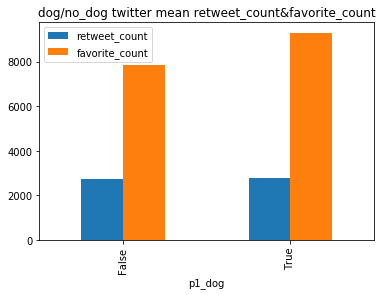

In [163]:
df.groupby('p1_dog')[['retweet_count','favorite_count']].mean().plot(kind = 'bar',title ='dog/no_dog twitter mean retweet_count&favorite_count')

在现有数据集中，从上图，以及分组统计的结果可以看出，包含宠物狗的推特信息的喜爱数要明显多于不含宠物狗的推特信息的喜爱数，二者的转发数差距不大。

### （3）宠物狗的等级对转发数和喜爱数的影响

In [154]:
df.stage.value_counts()

pupper          228
doggo            68
puppo            27
doggopupper       9
floofer           7
doggopuppo        2
doggofloofer      1
Name: stage, dtype: int64

In [161]:
df.groupby('stage')['favorite_count','retweet_count'].mean()

,favorite_count,retweet_count
stage,,
doggo,18289.529412,6749.897059
doggofloofer,17120.000000,3419.000000
doggopupper,12484.666667,4061.555556
doggopuppo,31960.500000,11432.000000
floofer,13156.857143,4935.000000
pupper,7008.710526,2285.030702
puppo,21880.814815,6298.148148


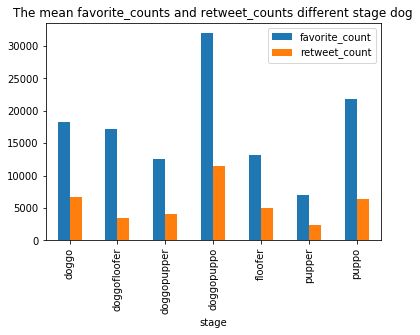

In [164]:
df.groupby('stage')['favorite_count','retweet_count'].mean().plot(kind='bar',title='The mean favorite_counts and retweet_counts different stage dog')

由于发布的推特信息中没有完全包含宠物狗的等级信息，所以这里我们用存在等级划分的数据，来观察宠物狗的不同等级对喜爱数和转发数的影响。通过上图可以发现，将宠物狗等级为doggopuppo的，最受欢迎，转发数和喜爱数都要高于其他等级的宠物狗，而等级为pupper的宠物狗的转发数和喜爱数都要比其他等级的要低。